# Submission

For each image in the test set, you must predict a list of instance segmentation masks and their associated detection score (Confidence). The submission csv file uses the following format:

<code>ImageID,ImageWidth,ImageHeight,PredictionString
ImageAID,ImageAWidth,ImageAHeight,LabelA1 ConfidenceA1 EncodedMaskA1 LabelA2 ConfidenceA2 EncodedMaskA2 ...
ImageBID,ImageBWidth,ImageBHeight,LabelB1 ConfidenceB1 EncodedMaskB1 LabelB2 ConfidenceB2 EncodedMaskB2 …</code>

Note that a mask MAY have more than one class. If that is the case, predict separate detections for each class using the same mask.

<code>ImageID,ImageWidth,ImageHeight,PredictionString
ImageAID,ImageAWidth,ImageAHeight,LabelA1 ConfidenceA1 EncodedMaskA1 LabelA2 ConfidenceA2 EncodedMaskA1 ...</code>

A sample with real values would be:

<code>ID,ImageWidth,ImageHeight,PredictionString
721568e01a744247,1118,1600,0 0.637833 eNqLi8xJM7BOTjS08DT2NfI38DfyM/Q3NMAJgJJ+RkBs7JecF5tnAADw+Q9I
7b018c5e3a20daba,1600,1066,16 0.85117 eNqLiYrLN7DNCjDMMIj0N/Iz9DcwBEIDfyN/QyA2AAsBRfxMPcKTA1MMADVADIo=</code>

In [1]:
import pandas as pd 
import base64
import numpy as np
from pycocotools import _mask as coco_mask
import typing as t
import zlib

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Sample submission
sample_csv = pd.read_csv('../input/sample_submission.csv')
sample_csv.sample(5)

,ID,ImageWidth,ImageHeight,PredictionString
252,7b5e40b3-aa76-4e7c-a6c6-b1e5ebb8d807,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
61,1a2a0cde-a1bc-4b71-81a1-459940468008,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
49,131ee8b4-de1d-435f-843c-a907dfda8416,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
93,2ea31aba-1f68-48cd-9691-cd4498669b3e,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
74,21d4426c-f36d-4f6e-b8de-e9c0085639b1,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==


In [3]:
def encode_binary_mask(mask: np.ndarray) -> t.Text:
    """Converts a binary mask into OID challenge encoding ascii text."""

    # check input mask --
    if mask.dtype != np.bool:
        raise ValueError(
           "encode_binary_mask expects a binary mask, received dtype == %s" %
           mask.dtype)

    mask = np.squeeze(mask)
    if len(mask.shape) != 2:
        raise ValueError(
           "encode_binary_mask expects a 2d mask, received shape == %s" %
           mask.shape)

    # convert input mask to expected COCO API input --
    mask_to_encode = mask.reshape(mask.shape[0], mask.shape[1], 1)
    mask_to_encode = mask_to_encode.astype(np.uint8)
    mask_to_encode = np.asfortranarray(mask_to_encode)

    # RLE encode mask --
    encoded_mask = coco_mask.encode(mask_to_encode)[0]["counts"]

    # compress and base64 encoding --
    binary_str = zlib.compress(encoded_mask, zlib.Z_BEST_COMPRESSION)
    base64_str = base64.b64encode(binary_str)
    return base64_str

## Sample Masks

I think PIL is slower than imread.

<code>red=plt.imread('../input/image_subset_example/image/'+i_d+'_red.png')</code>

In [4]:
df = pd.read_csv('../input/image_subset_example/example.csv')
df.head()

,ID,Label,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,a34d8680-bb99-11e8-b2b9-ac1f6b6435d0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,a7faf0b4-bb99-11e8-b2b9-ac1f6b6435d0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,f0ac7116-bb99-11e8-b2b9-ac1f6b6435d0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7|1|2|0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b6a469d8-bbad-11e8-b2ba-ac1f6b6435d0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
i_d = '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0'
label = '7|1|2|0'

In [6]:
def read_channels(i_d):
    red    = Image.open('../input/label_examples/'+i_d+'_red.png')
    green  = Image.open('../input/label_examples/'+i_d+'_green.png')
    blue   = Image.open('../input/label_examples/'+i_d+'_blue.png')
    yellow = Image.open('../input/label_examples/'+i_d+'_yellow.png')
    rgb = Image.merge("RGB",(red,green,blue))
    return(red, green, blue, yellow, rgb)
red, green, blue, yellow, rgb = read_channels(i_d)

In [7]:
mask = Image.open('../input/label_examples/'+i_d+'_predictedmask.png')

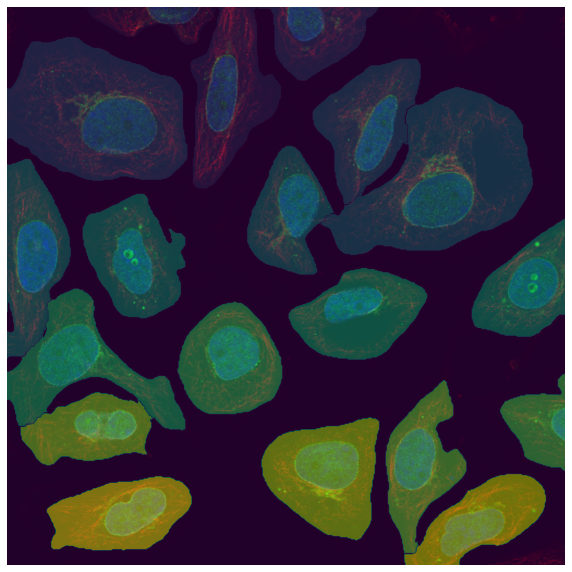

In [8]:
def display_mask(rgb, mask):
    # show full mask
    fig, ax = plt.subplots(figsize=(10,15))
    ax.imshow(rgb)
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')

display_mask(rgb, mask)

# Encoding Mask

In [10]:
np.unique(np.array(mask))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=uint8)

So each mask from the cell segmentation tool contains an image where each pixel which does not bold the value 0 is a cell. So all pixel values that are the value 1 are the 1st cell, same for 2, etc.

The encoded 

In [11]:
bmask = (np.array(mask)==1)

In [12]:
encode_binary_mask(bmask)

b'eNoLCAhJMjDLyjc09DcwMPSHQGNfU28Iy8gPwofQmBCkx8AAphNhAro4IT6x+ihVR7z7YACXOOkAYjWEBeMRhuj6CPOx20fIPcTrIy5ciIsfWPoy9kWlYemNUPojPT5JjSdUvr+hnxFyzHib+hqD2J7mqDTQIyg0Qheh+EWV9TNCtc89NtAv1D85zzDDwAYk5pof4OcSkm9oaY1QZRAQkBNvBABAEN9P'

In [ ]:
for j in range(np.max(cell_mask)):
    bmask = (cell_mask == j)
    enc = encode_binary_mask(bmask)
    predstring += '0 1 ' + enc + ' '
    predstrings.append(predstring)

## Helpful links to go forward with


https://www.kaggle.com/thedrcat/hpa-baseline-cell-segmentation/output

https://www.kaggle.com/thedrcat/fastai-quick-submission-template

https://www.kaggle.com/philiphucklesby/decoding-masks-from-the-rle-string

https://www.kaggle.com/olgapuntous/hpa-final-submission-1

https://www.kaggle.com/c/hpa-single-cell-image-classification/discussion/215981

https://www.kaggle.com/c/hpa-single-cell-image-classification/discussion/215141

https://www.kaggle.com/c/hpa-single-cell-image-classification/discussion?search=submission